In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
gt = pd.read_csv(open("ground_truth.out",'rb'), header=None, delim_whitespace=True)
l = pd.read_csv(open("L.out",'rb'), header=None, delim_whitespace=True)
r = pd.read_csv(open("R.out",'rb'), header=None, delim_whitespace=True)
lr = pd.read_csv(open("LR.out",'rb'), header=None, delim_whitespace=True)
raw = pd.read_csv(open("raw.out",'rb'), header=None, delim_whitespace=True)
raw_l = raw[raw[0] == "L"]
raw_r = raw[raw[0] == "R"]

In [3]:
# hard coded RMSE values: px, py, vx, vy
LR_rmse = [0.0973178, 0.0854597, 0.451267, 0.439935]
L_rmse = [0.122191, 0.0983799, 0.582513, 0.456699]
R_rmse = [0.191769, 0.279809, 0.557542, 0.656726]

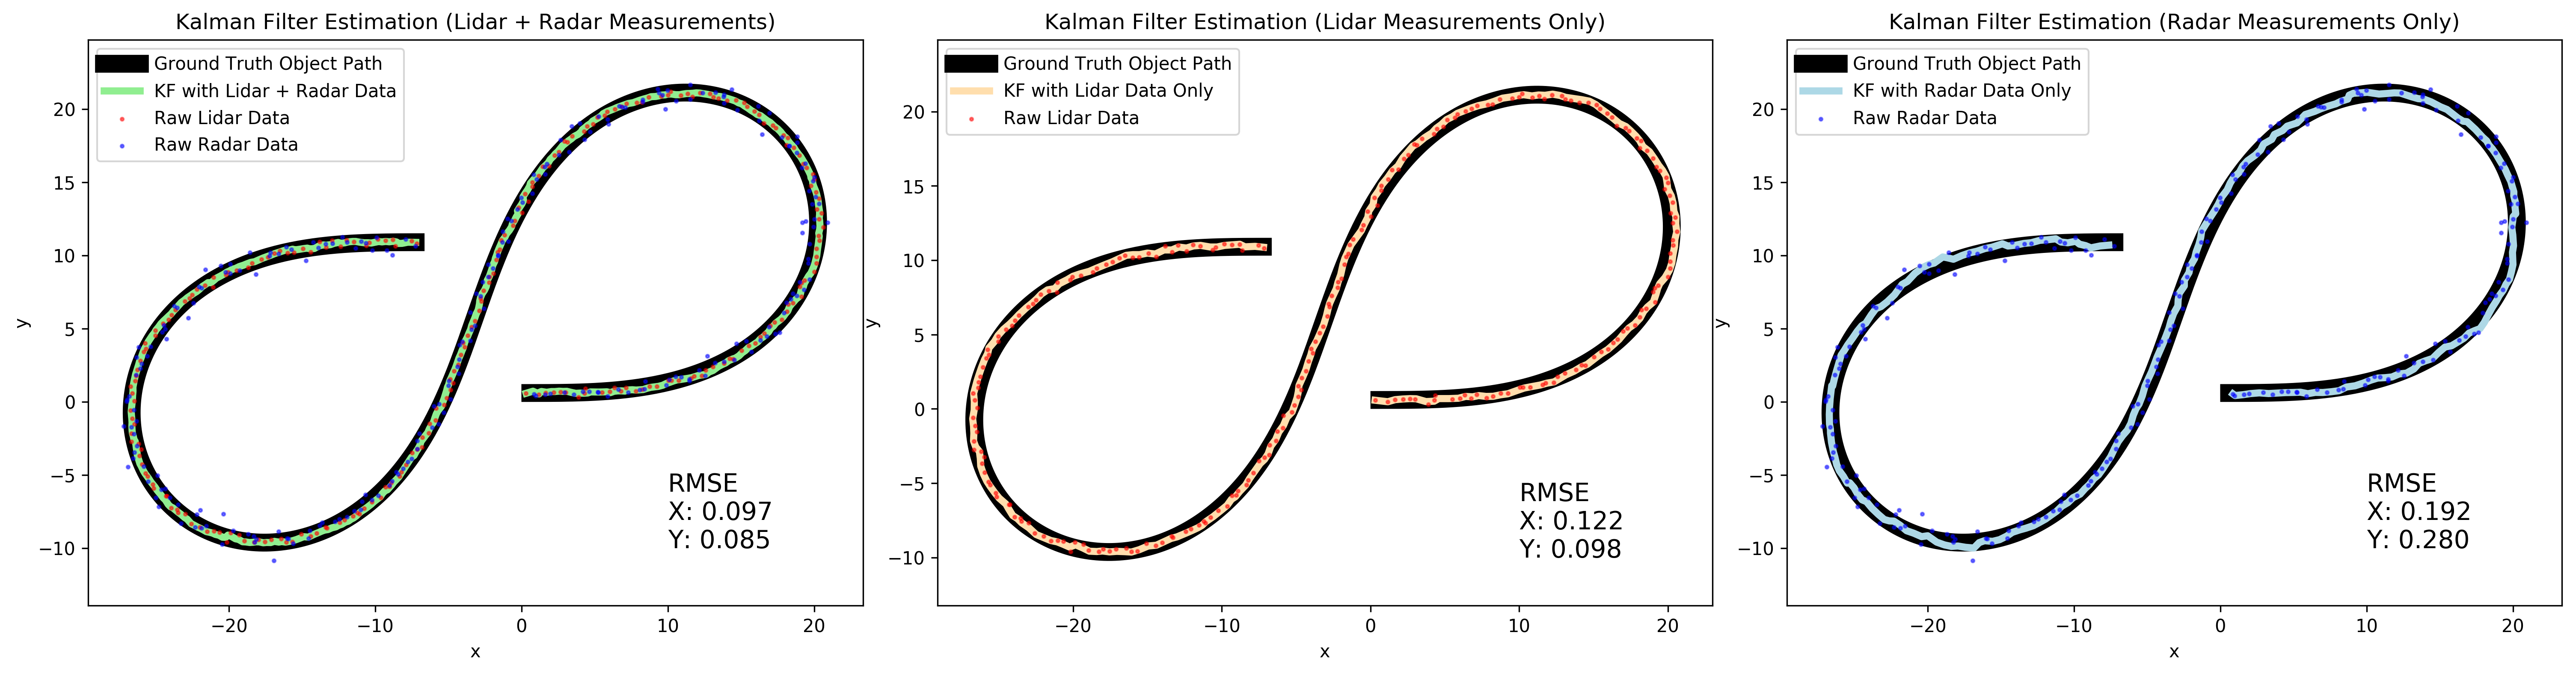

In [4]:
gt_color = 'black'
gt_label = "Ground Truth Object Path"
rmse_string = "RMSE\n{0}: {2:.3f}\n{1}: {3:.3f}"

x_label = "x"
y_label = "y"

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), dpi=300)
f.tight_layout()

ax1.plot(gt.iloc[:,0], gt.iloc[:,1], zorder=1, c=gt_color, lw=10, label=gt_label)
ax1.plot(lr.iloc[:,0], lr.iloc[:,1], zorder=2, c='lightgreen', lw=4, label="KF with Lidar + Radar Data")
ax1.scatter(raw_l.iloc[:,1], raw_l.iloc[:,2], zorder=3, c="red", s=3, alpha=0.5, label="Raw Lidar Data")
ax1.scatter(raw_r.iloc[:,1], raw_r.iloc[:,2], zorder=3, c="blue", s=3, alpha=0.5, label="Raw Radar Data")
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label)
ax1.set_title("Kalman Filter Estimation (Lidar + Radar Measurements)")
ax1.text(10, -10, rmse_string.format("X", "Y", LR_rmse[0], LR_rmse[1]), fontsize=14)
ax1.legend()

ax2.plot(gt.iloc[:,0], gt.iloc[:,1], c=gt_color, lw=10, label=gt_label)
ax2.plot(l.iloc[:,0], l.iloc[:,1], c='navajowhite', lw=4, label="KF with Lidar Data Only")
ax2.scatter(raw_l.iloc[:,1], raw_l.iloc[:,2], zorder=3, c="red", s=3, alpha=0.5, label="Raw Lidar Data")
ax2.set_xlabel(x_label)
ax2.set_ylabel(y_label)
ax2.set_title("Kalman Filter Estimation (Lidar Measurements Only)")
ax2.text(10, -10, rmse_string.format("X", "Y", L_rmse[0], L_rmse[1]), fontsize=14)
ax2.legend()

ax3.plot(gt.iloc[:,0], gt.iloc[:,1], c=gt_color, lw=10, label=gt_label)
ax3.plot(r.iloc[:,0], r.iloc[:,1], c='lightblue', lw=4, label="KF with Radar Data Only")
ax3.scatter(raw_r.iloc[:,1], raw_r.iloc[:,2], zorder=3, c="blue", s=3, alpha=0.5, label="Raw Radar Data")
ax3.set_xlabel(x_label)
ax3.set_ylabel(y_label)
ax3.set_title("Kalman Filter Estimation (Radar Measurements Only)")
ax3.text(10, -10, rmse_string.format("X", "Y", R_rmse[0], R_rmse[1]), fontsize=14)
ax3.legend()

ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
plt.show()

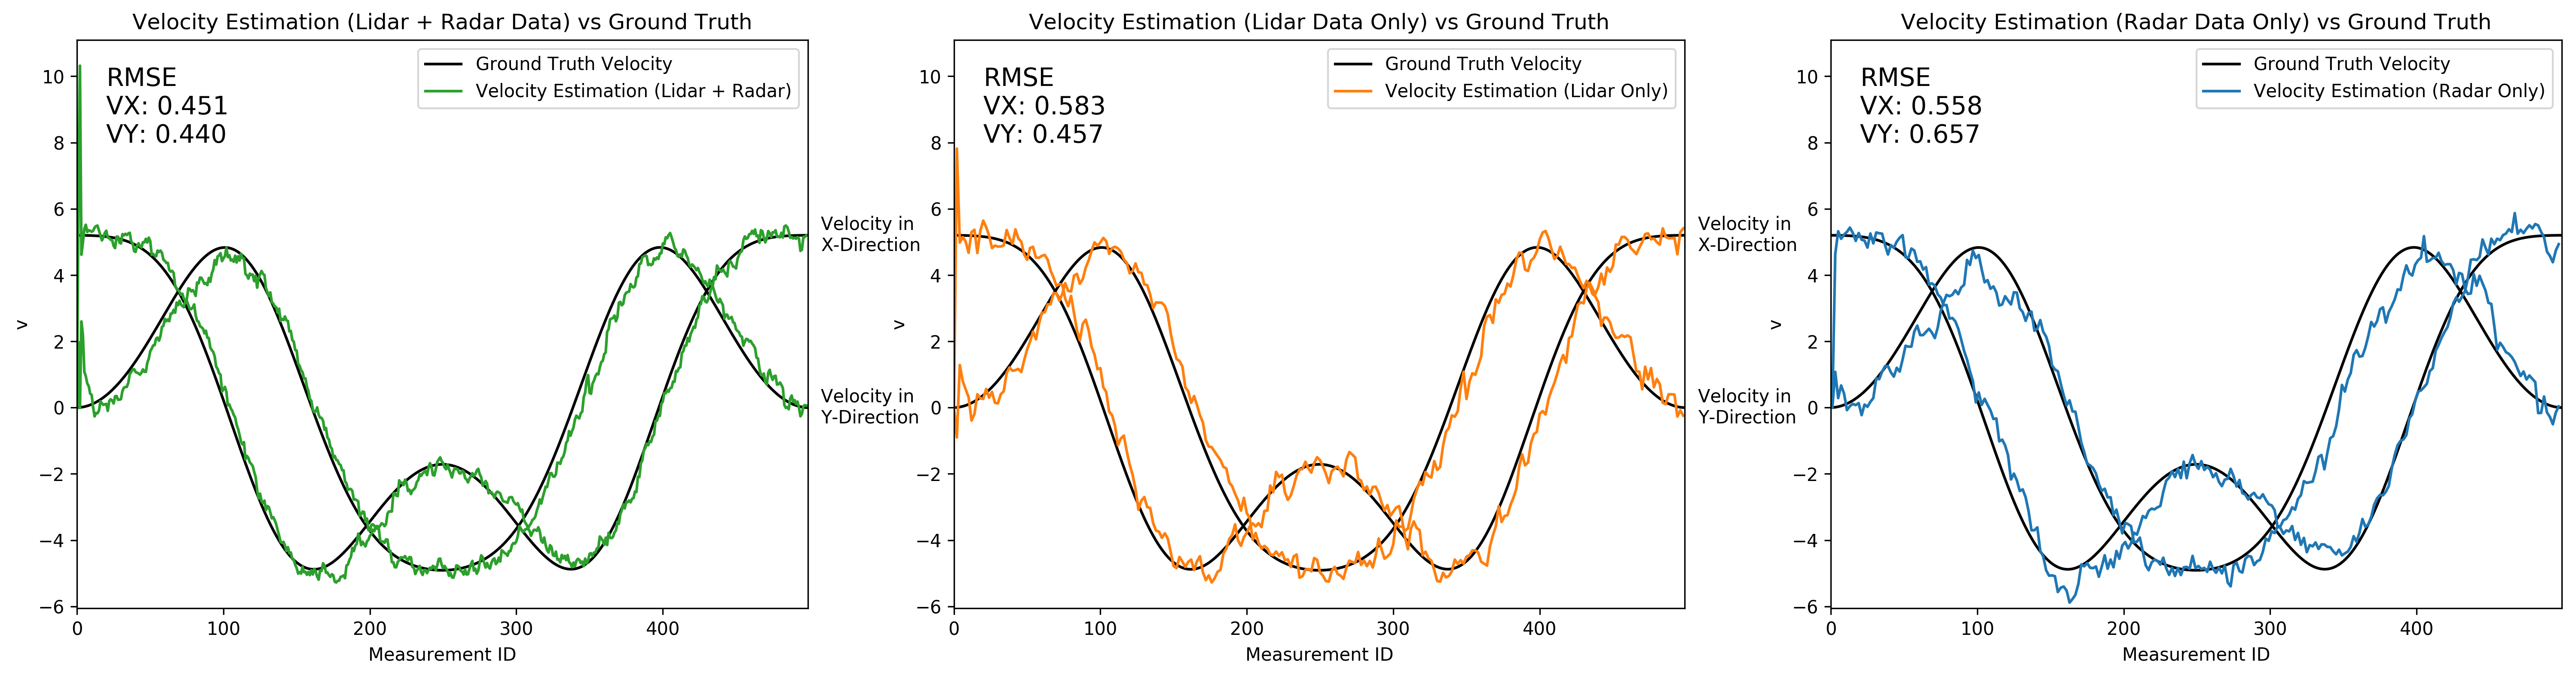

In [5]:
color_cycle = mpl.rcParams['axes.prop_cycle']()
blue = next(color_cycle)['color']
orange = next(color_cycle)['color']
green = next(color_cycle)['color']

gt_label = "Ground Truth Velocity"
vx_label = "Velocity in \nX-Direction"
vy_label = "Velocity in \nY-Direction"

x_label = "Measurement ID"
y_label = "v"
test_offset = 10

x = range(len(gt))
xl = range(0,len(gt),2)
xr = range(1,len(gt),2)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), dpi=300)
f.tight_layout()

ax1.plot(x, gt.iloc[:,2], c=gt_color, label=gt_label)
ax1.plot(x, gt.iloc[:,3], c=gt_color, label='_nolegend_')
ax1.plot(x, lr.iloc[:,2], c=green, label="Velocity Estimation (Lidar + Radar)")
ax1.plot(x, lr.iloc[:,3], c=green, label='_nolegend_')
ax1.text(x[-1]+test_offset, gt.iloc[-1,2], vx_label, va='center')
ax1.text(x[-1]+test_offset, gt.iloc[-1,3], vy_label, va='center')
ax1.set_xlim(0,x[-1]+1)
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label)
ax1.set_title("Velocity Estimation (Lidar + Radar Data) vs Ground Truth")
ax1.text(20, 8, rmse_string.format("VX", "VY", LR_rmse[2], LR_rmse[3]), fontsize=14)
ax1.legend()

ax2.plot(x, gt.iloc[:,2], c=gt_color, label=gt_label)
ax2.plot(x, gt.iloc[:,3], c=gt_color, label='_nolegend_')
ax2.plot(xl, l.iloc[:,2], c=orange, label="Velocity Estimation (Lidar Only)")
ax2.plot(xl, l.iloc[:,3], c=orange, label='_nolegend_')
ax2.text(x[-1]+test_offset, gt.iloc[-1,2], vx_label, va='center')
ax2.text(x[-1]+test_offset, gt.iloc[-1,3], vy_label, va='center')
ax2.set_xlim(0,x[-1]+1)
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlabel(x_label)
ax2.set_ylabel(y_label)
ax2.set_title("Velocity Estimation (Lidar Data Only) vs Ground Truth")
ax2.text(20, 8, rmse_string.format("VX", "VY", L_rmse[2], L_rmse[3]), fontsize=14)
ax2.legend()

ax3.plot(x, gt.iloc[:,2], c=gt_color, label=gt_label)
ax3.plot(x, gt.iloc[:,3], c=gt_color, label='_nolegend_')
ax3.plot(xr, r.iloc[:,2], c=blue, label="Velocity Estimation (Radar Only)")
ax3.plot(xr, r.iloc[:,3], c=blue, label='_nolegend_')
ax3.set_xlim(0,x[-1]+1)
ax3.set_ylim(ax1.get_ylim())
ax3.set_xlabel(x_label)
ax3.set_ylabel(y_label)
ax3.set_title("Velocity Estimation (Radar Data Only) vs Ground Truth")
ax3.text(20, 8, rmse_string.format("VX", "VY", R_rmse[2], R_rmse[3]), fontsize=14)
ax3.legend()

plt.subplots_adjust(wspace=0.2)
plt.show()